In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [2]:
# read from file
df = pd.read_csv("../data/adult.csv")

# replacing ? with nan a droping it from file
df.replace("?", np.nan, inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

# salary options validation
valid_salaries = ["<=50K", ">50K"]
df = df[df["salary"].isin(valid_salaries)]
df.reset_index(drop=True, inplace=True)

# salary validation for being positive num
df["salary K$"] = pd.to_numeric(df["salary K$"], errors="coerce")
df.dropna(subset=["salary K$"], inplace=True)
df = df[df["salary K$"] > 0]
df.reset_index(drop=True, inplace=True)
df

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
0,0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,39
1,1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,35
2,2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,27
3,3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,43
4,4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,36
30158,32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173
30159,32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,40
30160,32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K,38


# Task 1
Print the count of men and women in the dataset.

In [3]:
qnt_man = (df["sex"] == "Male").sum()
qnt_woman = (df["sex"] == "Female").sum()
qnt_woman

np.int64(9782)

# Task 2
Find the average age of men in dataset

In [4]:
men_df = df[df["sex"] == "Male"]
avg_man = df["age"].mean() 
avg_man


np.float64(38.437901995888865)

# Task 3
Get the percentage of people from Poland (native-country)

In [5]:
polands = (df["native-country"] == "Poland").sum() / df["native-country"].count()
polands

np.float64(0.0018566408063125787)

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

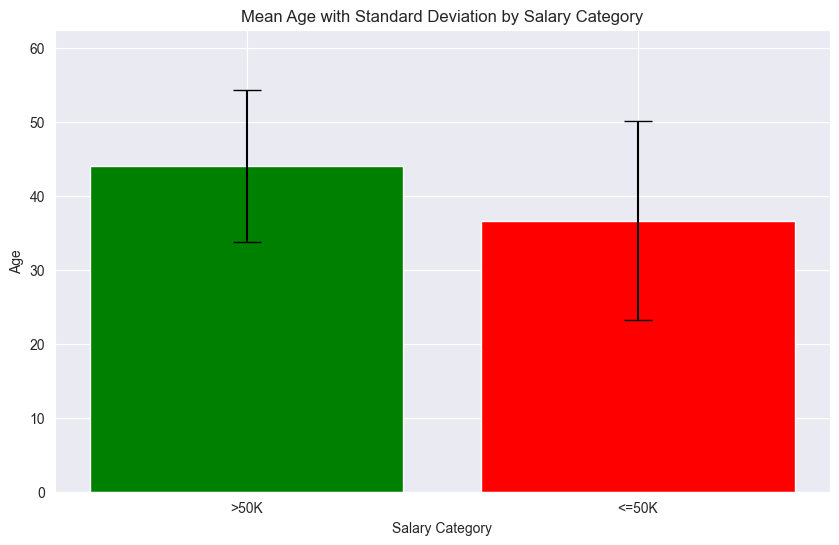

In [6]:
mean_age_gt_50k = df[df["salary"] == ">50K"]["age"].mean()
std_age_gt_50k = df[df["salary"] == ">50K"]["age"].std()

mean_age_lt_50k = df[df["salary"] == "<=50K"]["age"].mean()
std_age_lt_50k = df[df["salary"] == "<=50K"]["age"].std()

categories = [">50K", "<=50K"]
means = [mean_age_gt_50k, mean_age_lt_50k]
std_devs = [std_age_gt_50k, std_age_lt_50k]

plt.figure(figsize=(10, 6))
plt.bar(categories, means, yerr=std_devs, capsize=10, color=["green", "red"])
plt.title("Mean Age with Standard Deviation by Salary Category")
plt.xlabel("Salary Category")
plt.ylabel("Age")
plt.ylim(0, max(means) + max(std_devs) + 5)

plt.show()

# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [7]:
higher_edu = ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]
no_higher_edu = df[~df["education"].isin(higher_edu) & (df["salary"] == ">50K")]
how_many = no_higher_edu.shape[0]

print(how_many)

3178


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

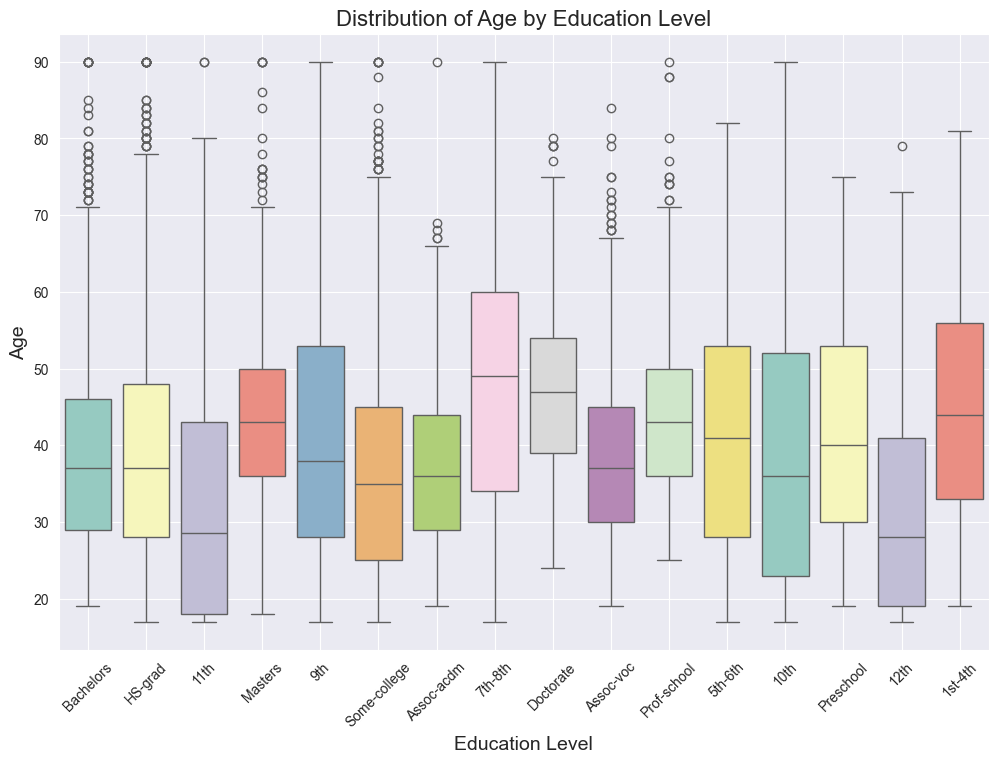

In [8]:
stats = df.groupby("education")["age"].describe()

plt.figure(figsize=(12, 8))
sns.boxplot(x="education", y="age", data=df, hue="education", palette="Set3", dodge=False)
plt.title("Distribution of Age by Education Level", fontsize=16)
plt.xlabel("Education Level", fontsize=14)
plt.ylabel("Age", fontsize=14)
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)
plt.grid(True)

# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

6440 1068
Marriend earns more


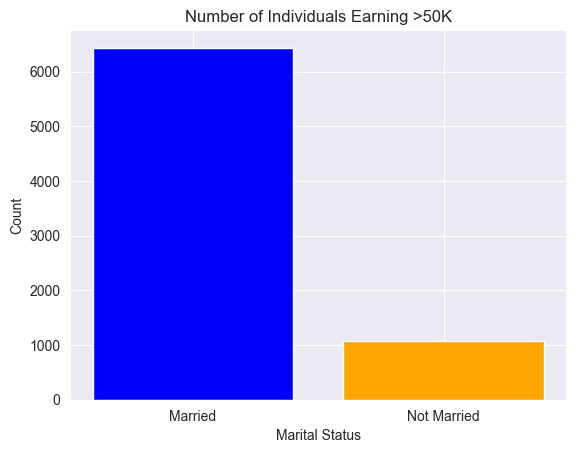

In [9]:
married_df = df[df["marital-status"].str.startswith("Married")]
not_married_df = df[~df["marital-status"].str.startswith("Married")]

married_earns = (married_df["salary"] == ">50K").sum()
not_married_earns = (not_married_df["salary"] == ">50K").sum()
print(married_earns, not_married_earns)
print("Marriend earns more")

categories = ["Married", "Not Married"]
counts = [married_earns, not_married_earns]

plt.bar(categories, counts, color=["blue", "orange"])
plt.title("Number of Individuals Earning >50K")
plt.xlabel("Marital Status")
plt.ylabel("Count")

plt.show()


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

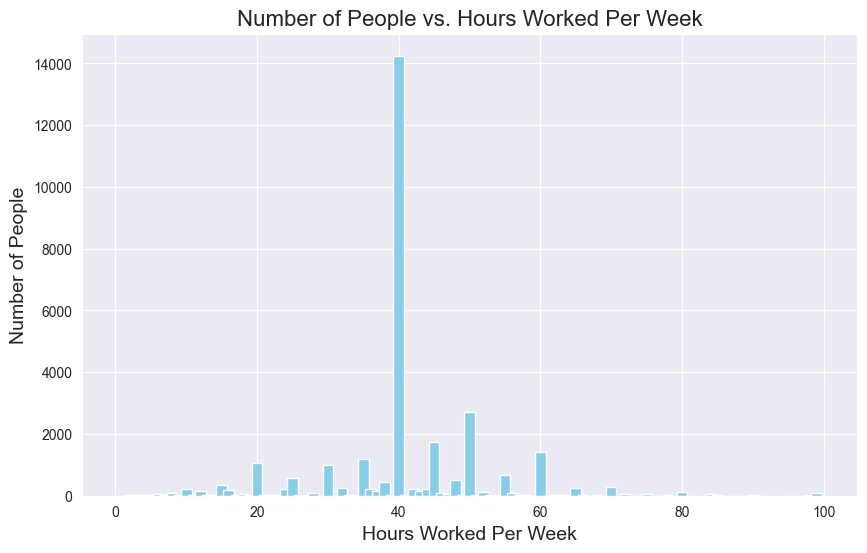

In [10]:
max_hours = df["hours-per-week"].max()
count_max_hours = (df["hours-per-week"] == max_hours).sum()

hours_count = df["hours-per-week"].value_counts().sort_index()

# Stats for people / hours a week 
plt.figure(figsize=(10, 6))
plt.bar(hours_count.index, hours_count.values, width=1.5, color="skyblue")
plt.title("Number of People vs. Hours Worked Per Week", fontsize=16)
plt.xlabel("Hours Worked Per Week", fontsize=14)
plt.ylabel("Number of People", fontsize=14)
plt.grid(True)

plt.show()

# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

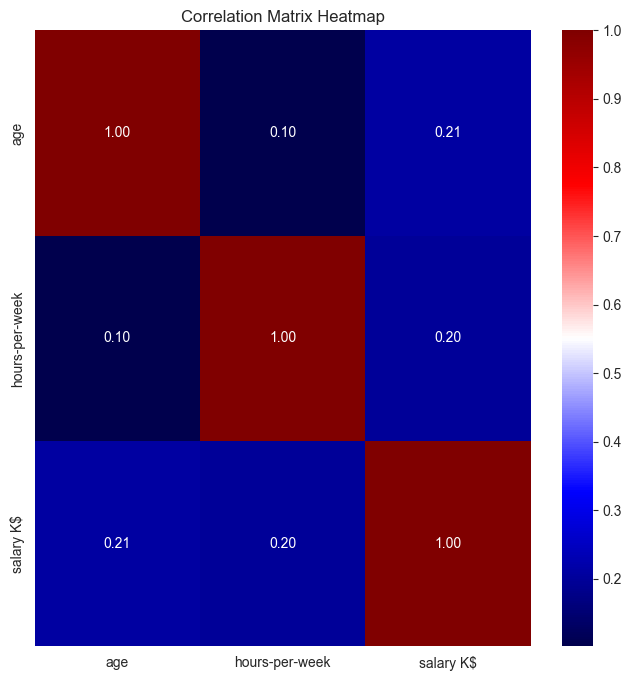

In [11]:
df = pd.DataFrame(df, columns=["age", "hours-per-week", "salary K$"])
correlation_matrix = df.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="seismic", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

#for git